<a href="https://colab.research.google.com/github/WONDERWOMAN2k/Agricultural-Data/blob/main/Agriculture_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install pandas numpy matplotlib seaborn plotly mysql-connector-python sqlalchemy


In [30]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload a file


Saving Agricultural Data.csv to Agricultural Data (1).csv


In [31]:
import pandas as pd

df = pd.read_csv('/content/Agricultural Data.csv')
print("File loaded successfully!")
print(df.head())


File loaded successfully!
   Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  1966          14  Chhattisgarh      Durg                548.0   
1          1  1967          14  Chhattisgarh      Durg                547.0   
2          1  1968          14  Chhattisgarh      Durg                556.3   
3          1  1969          14  Chhattisgarh      Durg                563.4   
4          1  1970          14  Chhattisgarh      Durg                571.6   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1                        409.0                  747.71                  50.0   
2                        468.0                  841.27                  53.7   
3                        400.8                  711.40                  49.4   
4                        473.6                  828.55                  44.2   

   WHEAT PRODUCTIO

In [32]:
import pandas as pd

# Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Fill missing values for numerical columns with median
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

# Fill missing values for categorical columns with mode (most frequent value)
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)

# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check for missing values after cleaning
print("Missing values after cleaning:\n", df.isnull().sum())

# Save the cleaned dataset
df.to_csv('/content/cleaned_agriculture_data.csv', index=False)

print("Data cleaning complete! Cleaned dataset saved as 'cleaned_agriculture_data.csv'")


Missing values before cleaning:
 Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64
Missing values after cleaning:
 dist_code                               0
year                                    0
state_code                              0
state_name                              0
dist_name                               0
                                       ..
vegetables_area_(1000_ha)               0
fruits_and_vegetables_area_(1000_ha)    0
potatoes_area_(1000_ha)                 0
onion_area_(1000_ha)                    0
fodder_area_(1000_ha)       

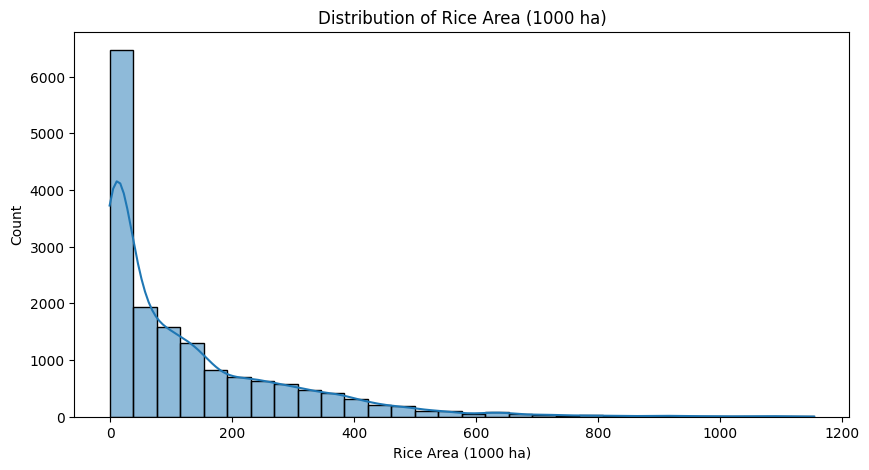

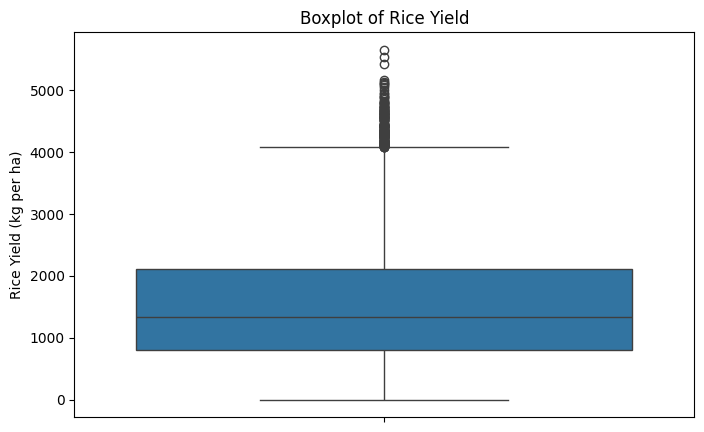

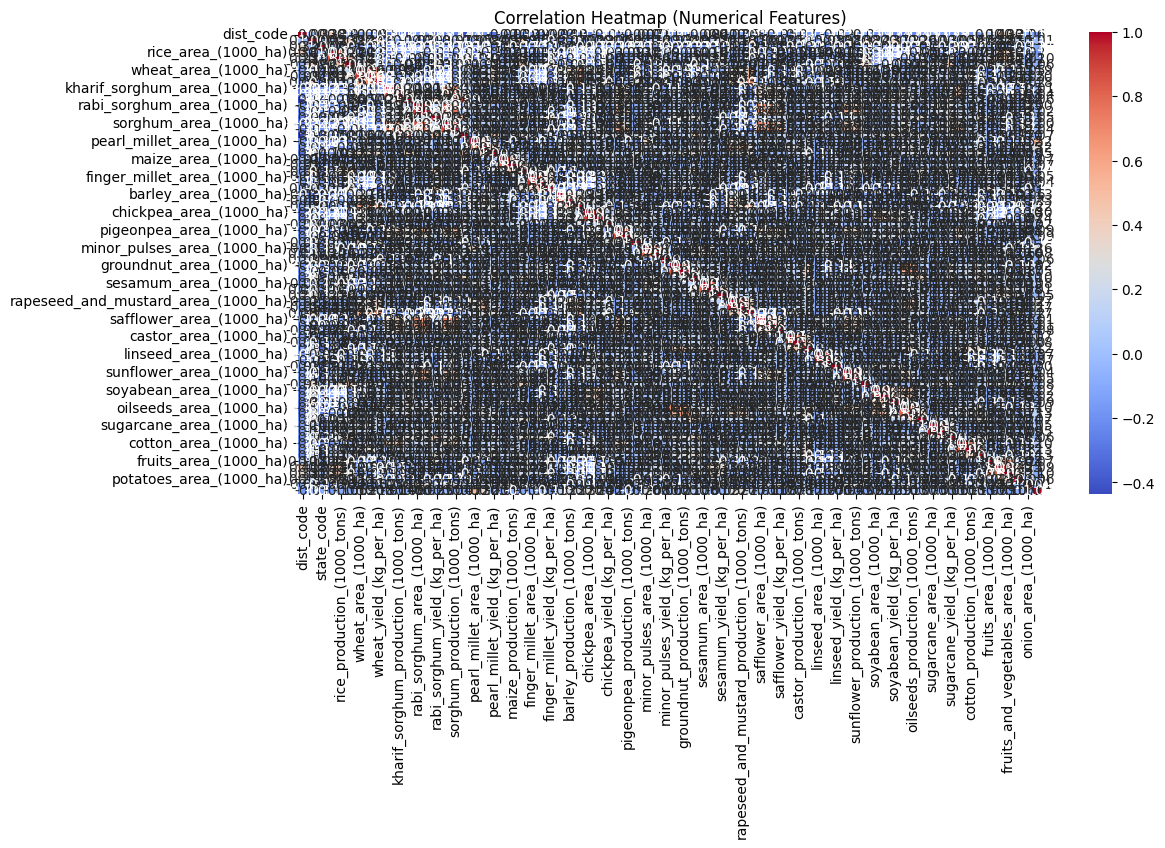

<ipython-input-33-9ae4a83b7d9d>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")


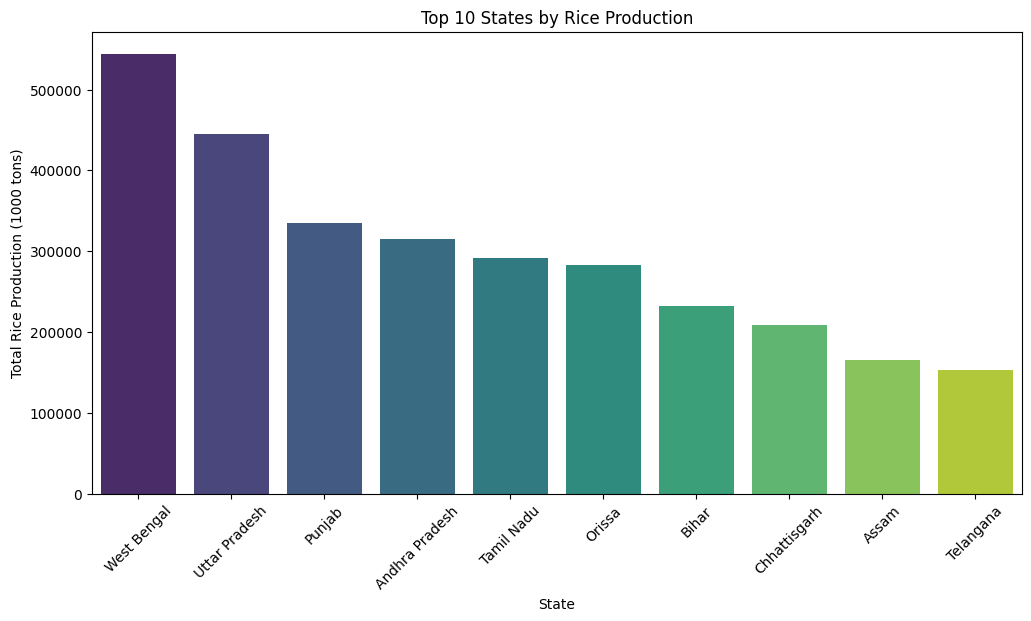

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df.to_csv('/content/cleaned_agriculture_data.csv', index=False)


# 1️⃣ Handling Missing Values
# Fill missing values for numerical columns with median
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

# Fill missing values for categorical columns with the mode (most frequent value)
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)

# 2️⃣ Data Cleaning
# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Save the cleaned dataset
df.to_csv('/content/cleaned_agriculture_data.csv', index=False)

# 3️⃣ Data Visualizations

# 🔹 Distribution of "Rice Area" (Example Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(df['rice_area_(1000_ha)'], bins=30, kde=True)
plt.title("Distribution of Rice Area (1000 ha)")
plt.xlabel("Rice Area (1000 ha)")
plt.ylabel("Count")
plt.show()

# 🔹 Boxplot for Rice Yield
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['rice_yield_(kg_per_ha)'])
plt.title("Boxplot of Rice Yield")
plt.ylabel("Rice Yield (kg per ha)")
plt.show()

# 🔹 Correlation Heatmap (Fix: Use only numerical columns)
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# 🔹 Top 10 States by Total Rice Production
top_states = df.groupby('state_name')['rice_production_(1000_tons)'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 States by Rice Production")
plt.xlabel("State")
plt.ylabel("Total Rice Production (1000 tons)")
plt.show()


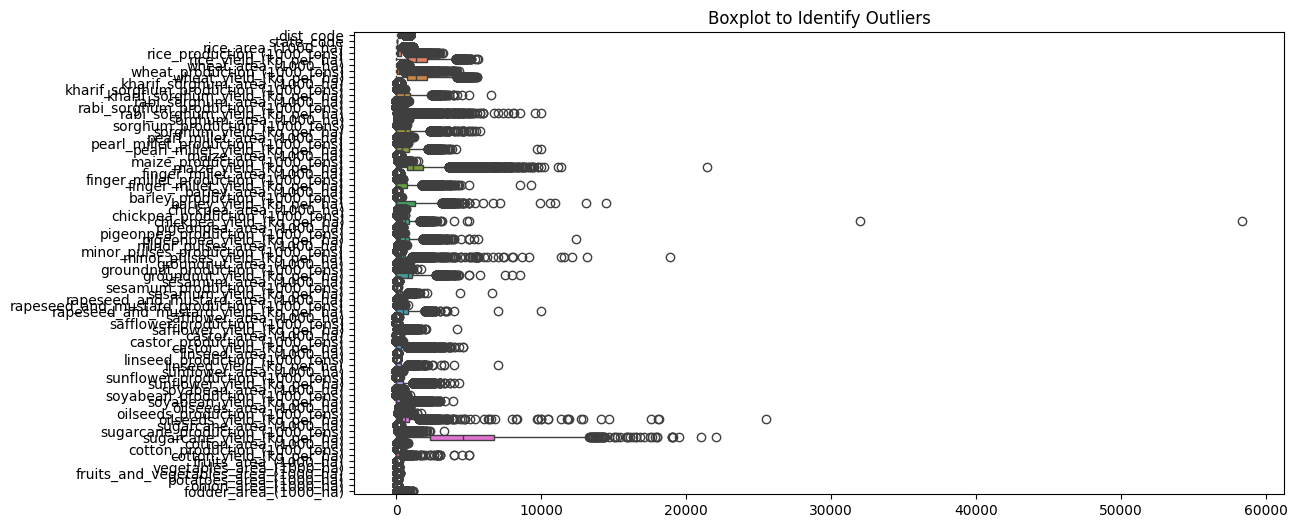

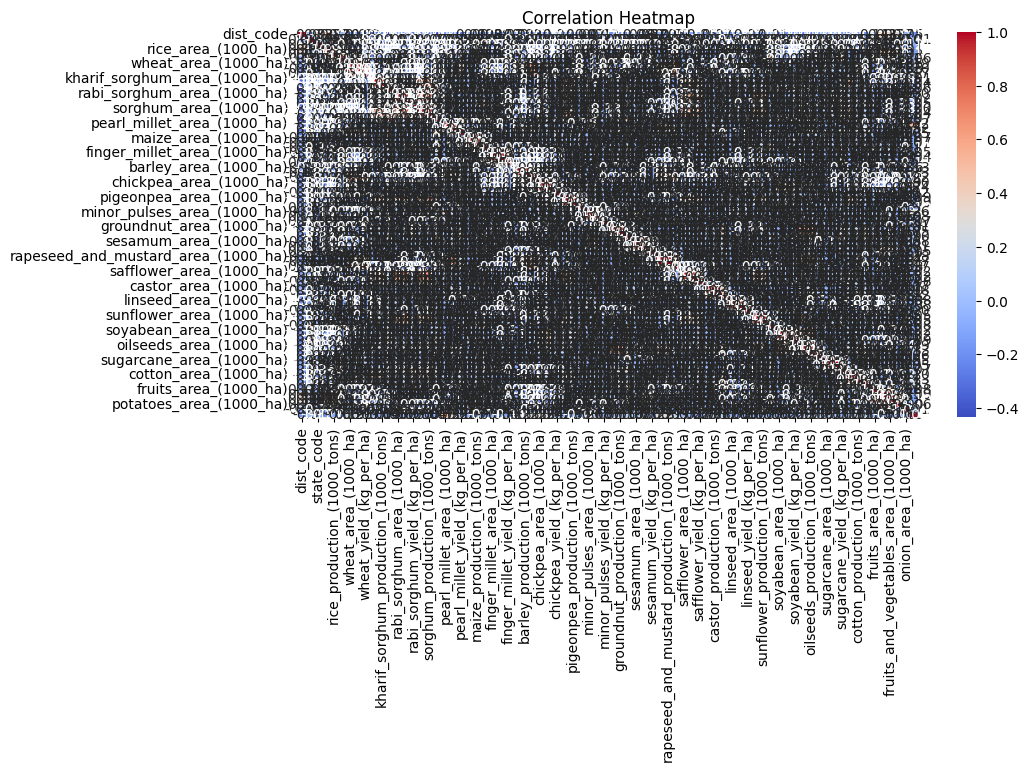

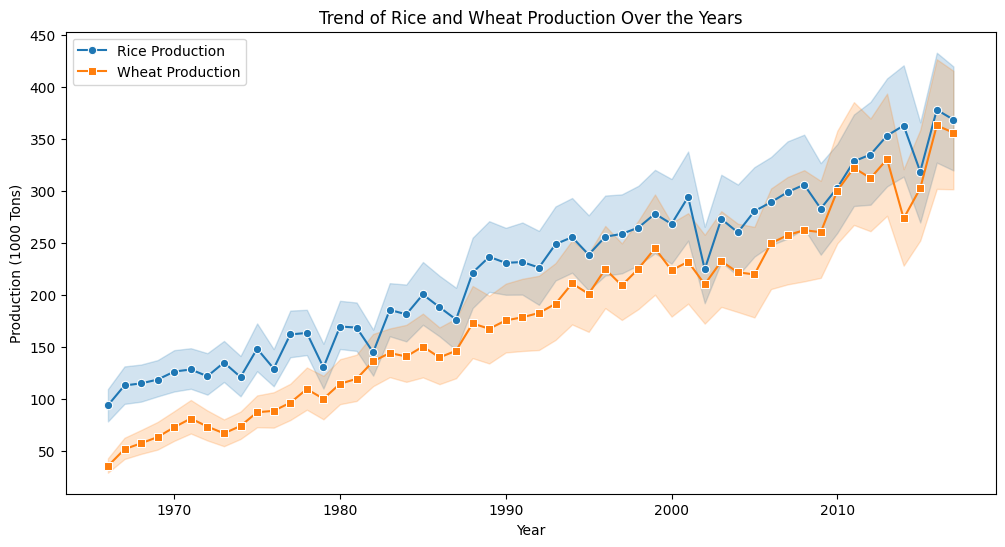

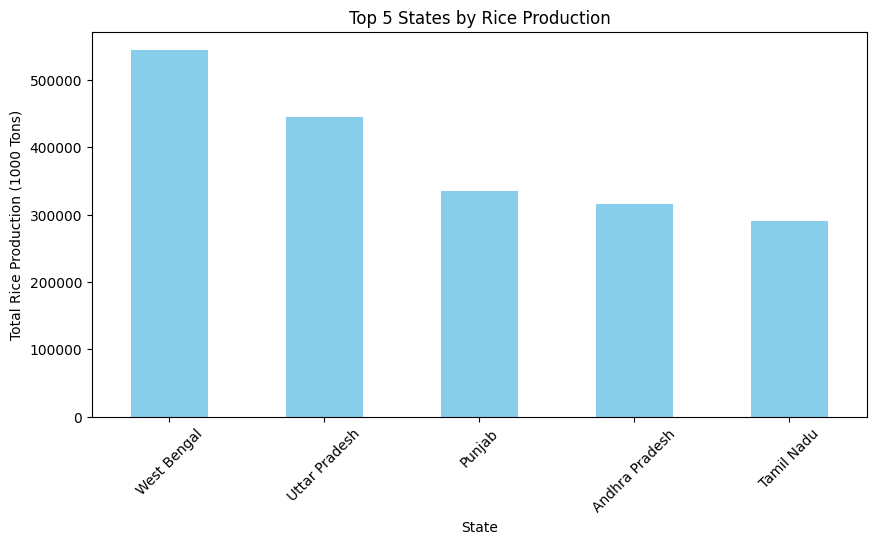

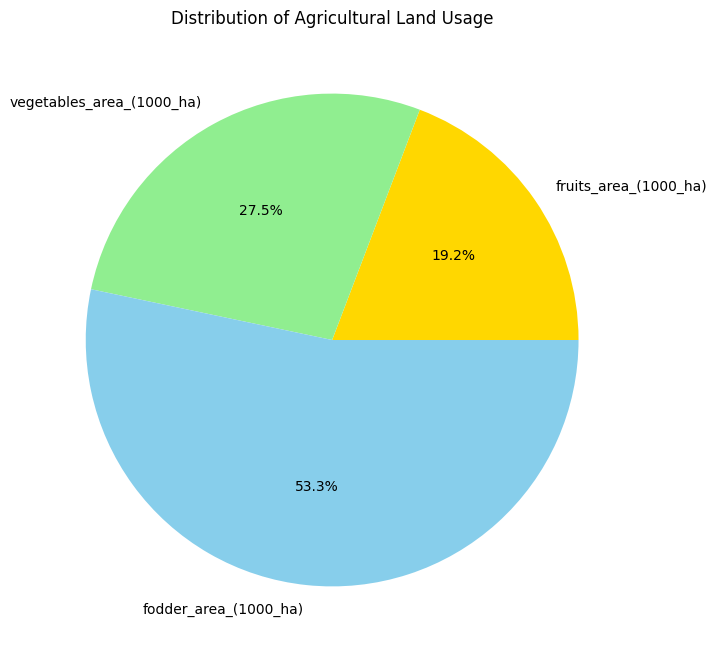

In [34]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('/content/cleaned_agriculture_data.csv')

# 1️⃣ Handle Outliers

# Replace negative values (-1) in numerical columns with NaN
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].replace(-1, np.nan)

# Fill missing values after removing outliers
# Fill missing values only for numeric columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


# Visualizing outliers using Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols].drop(columns=['year']), orient='h')
plt.title("Boxplot to Identify Outliers")
plt.show()

# 2️⃣ Feature Engineering

# Creating a new column: Production per Hectare for Rice
df['rice_prod_per_ha'] = df['rice_production_(1000_tons)'] / df['rice_area_(1000_ha)']
df['wheat_prod_per_ha'] = df['wheat_production_(1000_tons)'] / df['wheat_area_(1000_ha)']

# Normalize the production per hectare
df['rice_prod_per_ha'] = (df['rice_prod_per_ha'] - df['rice_prod_per_ha'].min()) / (df['rice_prod_per_ha'].max() - df['rice_prod_per_ha'].min())
df['wheat_prod_per_ha'] = (df['wheat_prod_per_ha'] - df['wheat_prod_per_ha'].min()) / (df['wheat_prod_per_ha'].max() - df['wheat_prod_per_ha'].min())

# 3️⃣ Data Visualizations

# Correlation Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Trend Analysis: Rice & Wheat Production over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rice_production_(1000_tons)', data=df, label="Rice Production", marker="o")
sns.lineplot(x='year', y='wheat_production_(1000_tons)', data=df, label="Wheat Production", marker="s")
plt.title("Trend of Rice and Wheat Production Over the Years")
plt.xlabel("Year")
plt.ylabel("Production (1000 Tons)")
plt.legend()
plt.show()

# Top 5 States by Rice Production
top_states = df.groupby('state_name')['rice_production_(1000_tons)'].sum().nlargest(5)
plt.figure(figsize=(10, 5))
top_states.plot(kind='bar', color='skyblue')
plt.title("Top 5 States by Rice Production")
plt.xlabel("State")
plt.ylabel("Total Rice Production (1000 Tons)")
plt.xticks(rotation=45)
plt.show()

# Pie Chart: Distribution of Agricultural Land Usage
land_usage = df[['fruits_area_(1000_ha)', 'vegetables_area_(1000_ha)', 'fodder_area_(1000_ha)']].sum()
plt.figure(figsize=(8, 8))
land_usage.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightgreen', 'skyblue'])
plt.title("Distribution of Agricultural Land Usage")
plt.ylabel("")
plt.show()

# Save the updated dataset
df.to_csv('/content/eda_agriculture_data.csv', index=False)


In [35]:
!git config --global user.name "YourGitHubUsername"
!git config --global user.email "YourEmail@example.com"

# Clone your repository (if not already done)
!git clone https://github.com/YOUR_USERNAME/YOUR_REPOSITORY.git
%cd YOUR_REPOSITORY

# Add files and commit changes
!git add .
!git commit -m "Added EDA and Data Cleaning"

# Push changes (replace TOKEN with your GitHub token)
!git push https://YOUR_GITHUB_TOKEN@github.com/YOUR_USERNAME/YOUR_REPOSITORY.git


Cloning into 'YOUR_REPOSITORY'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'YOUR_REPOSITORY'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
